Drawing a subset of data from biendata

In [2]:
import os, shutil, csv

In [11]:
#original_dataset_dir = '/Users/mithyyin/Documents/GitHub/TeamEve/Classfication_small_datasets_inception_v3/waste_original_dataset' #directory name of your biendata
original_dataset_dir =r'C:\Users\oscarscaro\Documents\GitHub\TeamEve\Classfication_small_datasets_inception_v3\images_withoutrect'
base_dir = './data_small' #create a directory for the data subset

#os.mkdir(base_dir)

#creating a new folder for each set
train_dir = os.path.join(base_dir, 'train') 
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
#os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
#os.mkdir(test_dir)

In [12]:
#making a folder for each category inside train folder
#there are 204 categories with ID 1..204

for i in range(1,205):
    train_categories_dir = os.path.join(train_dir, str(i))
    #os.mkdir(train_categories_dir)
    
for i in range(1,205):
    validation_categories_dir = os.path.join(validation_dir, str(i))
    #os.mkdir(validation_categories_dir)
    
for i in range(1,205):
    test_categories_dir = os.path.join(test_dir,str(i))
    #os.mkdir(test_categories_dir)

In [13]:
#importing csv files, and change it into a list

with open('train.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

In [14]:
data.pop(0)

['category_id', 'image_id', 'file_name']

In [15]:
print(data[i][1])
print(len(data))


11739
80000


In [ ]:
#rewritten code number 2
for i in range(1,205):
    directory = os.path.join(original_dataset_dir,str(i))
    
    fnames = []
    for i in len(data)
        fnames.append(data[i][1])
    
    for fname in os.listdir(directory):
        #src = os.path.join(original_dataset_dir, fname) 
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(fname, dst)

In [16]:
#rewritten code fort iterating over a datasets
import os

#directory = os.fsencode('waste_original_dataset')

#for category in os.listdir(directory):
for i in range(1,205):
    count1 = 0
    file = os.path.join(original_dataset_dir, str(i))
    #fnames = ['cat.{}.jpg'.format(i) for i in data[i][1]]
    #training
    if i == 36:
        continue
    if i == 96:
        continue
    if i == 121:
        continue
    if i == 147:
        continue
    if i == 174:
        continue
    if i == 175: 
        continue
    for fname in os.listdir(file):
        if count1 <= 100:
            src = os.path.join(file, fname)
            file_path = os.path.join(train_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1
        if count1 > 100 and count1<=150:
            src = os.path.join(file, fname)
            file_path = os.path.join(validation_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1
        if count1 > 150 and count1<=200:
            src = os.path.join(file, fname)
            file_path = os.path.join(test_dir,str(i))
            dst = os.path.join(file_path, fname)
            shutil.copyfile(src, dst)
            count1 += 1

In [ ]:
#checking if it is indeed the amount
print('total training images:', len(os.listdir(train_cats_dir)))

Training model building

In [17]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.engine import Input, Model
from keras.optimizers import SGD
from keras.callbacks import Callback, LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras.backend as K
import json
import time
import keras

Using TensorFlow backend.


In [18]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, enable=True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


As of keras 2, the module keras.layers.merge doesn't have a generic public Merge-Layer. Instead you are supposed to import the subclasses like keras.layers.Add or keras.layers.Concatenate etc. directly (or their functional interfaces with the same names lowercase: keras.layers.add, keras.layers.concatenate etc.).

In [19]:
#complete building function of Resnet x Inception v2
# we reduce # filters by factor of 8 compared to original inception-v4
nb_filters_reduction_factor = 8

def inception_resnet_v2_stem(x):
    # in original inception-resnet-v2, conv stride is 2
    x = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    x = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    x = Convolution2D(64//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    # in original inception-resnet-v2, stride is 2
    a = MaxPooling2D((3, 3), strides=(1, 1), padding='valid', data_format="channels_last")(x)
    # in original inception-resnet-v2, conv stride is 2
    b = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
   # x = merge([a, b], mode='concat', concat_axis=-1)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    a = Convolution2D(64//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    a = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(a)
    b = Convolution2D(64//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(64//nb_filters_reduction_factor, (7, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(64//nb_filters_reduction_factor, (1, 7), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(96//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(b)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    # in original inception-resnet-v2, conv stride should be 2
    a = Convolution2D(192//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    # in original inception-resnet-v2, stride is 2
    b = MaxPooling2D((3, 3), strides=(1, 1), padding='valid', data_format="channels_last")(x)
    x = keras.layers.concatenate([a,b],axis=-1)
    
    x = Activation('relu')(x)
    return x

def inception_resnet_v2_A(x):
    shortcut = x
    
    a = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(32//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    c = Convolution2D(32//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(48//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    c = Convolution2D(64//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    
    x = keras.layers.concatenate([a,b,c],axis=-1)
    x = Convolution2D(384//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    #x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

def inception_resnet_v2_reduction_A(x):
    a = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', data_format="channels_last")(x)
    b = Convolution2D(384//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(x)
    c = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(256//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(c)
    c = Convolution2D(384//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(c)
    
    x = keras.layers.concatenate([a,b,c],axis=-1)
    
    return x
    

def inception_resnet_v2_B(x):
    shortcut = x
    
    a = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(128//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(160//nb_filters_reduction_factor, (1, 7), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(192//nb_filters_reduction_factor, (7, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    x = keras.layers.concatenate([a,b],axis=-1)
    x = Convolution2D(1154//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    #x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

def inception_resnet_v2_reduction_B(x):
    a = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', data_format="channels_last")(x)
    b = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(b)
    c = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    c = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(c)
    d = Convolution2D(256//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    d = Convolution2D(288//nb_filters_reduction_factor, (3, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(d)
    d = Convolution2D(320//nb_filters_reduction_factor, (3, 3), strides=(2, 2), activation='relu',
                      kernel_initializer='he_normal', padding='valid', data_format="channels_last")(d)
    
    x = keras.layers.concatenate([a,b,c,d],axis=-1)
    
    return x


def inception_resnet_v2_C(x):
    shortcut = x
    
    a = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
    b = Convolution2D(192//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    b = Convolution2D(224//nb_filters_reduction_factor, (1, 3), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    b = Convolution2D(256//nb_filters_reduction_factor, (3, 1), strides=(1, 1), activation='relu',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(b)
    
    x = keras.layers.concatenate([a,b],axis=-1)
    x = Convolution2D(2048//nb_filters_reduction_factor, (1, 1), strides=(1, 1), activation='linear',
                      kernel_initializer='he_normal', padding='same', data_format="channels_last")(x)
    
   # x = merge([shortcut, x], mode='sum')
    x = keras.layers.add([shortcut,x])
    x = Activation('relu')(x)
    
    return x

In [21]:
img_rows, img_cols = 150, 150
img_channels = 3

nb_classes = 204

# in original inception-resnet-v2, these are 5, 10, 5, respectively
num_A_blocks = 1
num_B_blocks = 1
num_C_blocks = 1

inputs = Input(shape=(img_rows, img_cols, img_channels))

x = inception_resnet_v2_stem(inputs)
for i in range(num_A_blocks):
    x = inception_resnet_v2_A(x)
x = inception_resnet_v2_reduction_A(x)
for i in range(num_B_blocks):
    x = inception_resnet_v2_B(x)
x = inception_resnet_v2_reduction_B(x)
for i in range(num_C_blocks):
    x = inception_resnet_v2_C(x)

x = AveragePooling2D(pool_size=(4, 4), strides=(1, 1), padding='valid', data_format="channels_last")(x)
x = Dropout(0.5)(x)
x = Flatten()(x)

predictions = Dense(nb_classes, activation='softmax')(x)

model = Model(input=inputs, output=predictions)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 148, 148, 4)  112         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 146, 146, 4)  148         conv2d_40[0][0]                  
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 146, 146, 8)  296         conv2d_41[0][0]                  
____________________________________________________________________________________________

In [23]:
model.compile(optimizer='adam',  #optimizer=optimizers.RMSprop(lr=2e-5), could also try that
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [33]:
#setting up all the parameter for training
batch_size = 16 #try 32, 128
epoch = 100 # try 50, 100.
data_augmentation = True

# preprocessing the data

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [25]:
import os
base_dir = './data_small'
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation') 
test_dir = os.path.join(base_dir, 'test') 

In [26]:
#preprocessing the data implementation
#using data implementation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir, #train_dir is the path where you store all the validaiton folder, chnage this
    target_size = (150,150), #try 1920,1080
    batch_size = batch_size,
    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
    validation_dir, #train_dir is the path where you store all the validation folder, change this
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 19998 images belonging to 204 classes.
Found 9900 images belonging to 204 classes.


In [38]:
# saving the best model
# checkpoint
from keras.callbacks import TensorBoard

filepath="waste_sort_weights_best.h5"


checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [keras.callbacks.TensorBoard(
    log_dir = 'my_log_dir',
    histogram_freq=0, #records activation histogram every 1 epoch
    embeddings_freq=0,
    #write_graph=True,
    #write_images=True#recoding embedding data every 1 epoch
                                             ),checkpoint]

#for windows
#log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='my_log', histogram_freq=0)


callbacks_list2 = [tensorboard_callback,checkpoint]

In [39]:
#training the model, fit the data
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=epoch,
validation_data=validation_generator,
validation_steps=50,
callbacks = callbacks_list2) #change here

AttributeError: 'Model' object has no attribute '_get_distribution_strategy'

In [11]:
model.save('wastesorting_resnet_inception_v2.h5') #model checkpoints for the last epoch

In [ ]:
from keras.models import load_model
model = load_model('wastesorting_resnet_inception_v2.h5')

In [ ]:
#predicting the results

# from keras.models import load_model
# model = load_model('waste_sort_weights_best.h5')

In [44]:
#this is from my mac, we had differnt version.
#import the model_weights
from keras.models import load_model

model.load_weights('wastesorting_resnet_inception_v2.h5')

model.compile(optimizer='adam',  #optimizer=optimizers.RMSprop(lr=2e-5), could also try that
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [68]:
#Compiling a test for the model

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

img_path = '/Users/mithyyin/Documents/GitHub/TeamEve/Classfication_small_datasets_inception_v3/test/0/0a34b84485dc.png'

img = image.load_img(img_path, target_size=(229,229))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x /= 255. #don't forget this shit brother

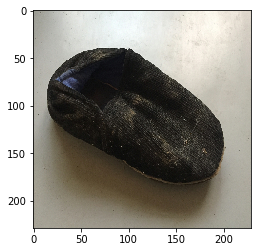

In [69]:
import matplotlib.pyplot as plt

plt.imshow(x[0])
plt.show()

In [71]:
images = np.vstack([x])

classes = model.predict(x)
y_classes = classes.argmax(axis=-1)

print(y_classes)

[49]


In [81]:
import csv
import json
from keras.preprocessing.image import ImageDataGenerator

headers=['id', 'label']
cat_temp={0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 
          10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 
          20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 
          30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 
          40: 42, 41: 43, 42: 44, 43: 45, 44: 46, 45: 47, 46: 48, 47: 49, 48: 50, 49: 51, 
          50: 52, 51: 53, 52: 54, 53: 55, 54: 56, 55: 57, 56: 58, 57: 59, 58: 60, 59: 61, 
          60: 62, 61: 63, 62: 64, 63: 65, 64: 66, 65: 67, 66: 68, 67: 69, 68: 70, 69: 71, 
          70: 72, 71: 73, 72: 74, 73: 75, 74: 76, 75: 77, 76: 78, 77: 79, 78: 80, 79: 81, 
          80: 82, 81: 83, 82: 84, 83: 85, 84: 86, 85: 87, 86: 88, 87: 89, 88: 90, 89: 91, 
          90: 92, 91: 93, 92: 94, 93: 95, 94: 97, 95: 98, 96: 99, 97: 100, 98: 101, 99: 102, 
          100: 103, 101: 104, 102: 105, 103: 106, 104: 107, 105: 108, 106: 109, 107: 110, 108: 111, 109: 112, 
          110: 113, 111: 114, 112: 115, 113: 116, 114: 117, 115: 118, 116: 119, 117: 120, 118: 122, 119: 123, 
          120: 124, 121: 125, 122: 126, 123: 127, 124: 128, 125: 129, 126: 130, 127: 131, 128: 132, 129: 133, 
          130: 134, 131: 135, 132: 136, 133: 137, 134: 138, 135: 139, 136: 140, 137: 141, 138: 142, 139: 143, 
          140: 144, 141: 145, 142: 146, 143: 148, 144: 149, 145: 150, 146: 151, 147: 152, 148: 153, 149: 154, 
          150: 155, 151: 156, 152: 157, 153: 158, 154: 159, 155: 160, 156: 161, 157: 162, 158: 163, 159: 164, 
          160: 165, 161: 166, 162: 167, 163: 168, 164: 169, 165: 170, 166: 171, 167: 172, 168: 173, 169: 176, 
          170: 177, 171: 178, 172: 179, 173: 180, 174: 181, 175: 182, 176: 183, 177: 184, 178: 185, 179: 186, 
          180: 187, 181: 188, 182: 189, 183: 190, 184: 191, 185: 192, 186: 193, 187: 194, 188: 195, 189: 196, 
          190: 197, 191: 198, 192: 199, 193: 200, 194: 201, 195: 202, 196: 203, 197: 204}

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(229, 229),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)
test_generator.reset()

pred = model.predict_generator(test_generator, verbose=1)
with open('test.csv', mode='w', newline='') as f1:
    f1_writer=csv.writer(f1, headers)
    f1_writer.writerow(headers)
    # f1_writer.writerow([''] + range(1000000))
    for i in range(100):
        #print(item)
        likeliness=pred[i].tolist()
        print(test_generator.filenames[i][2:14]+' '+str(cat_temp[likeliness.index(max(pred[i]))])+' '+str(max(likeliness)))
        f1_writer.writerow([
            test_generator.filenames[i][2:14],
            cat_temp[likeliness.index(max(pred[i]))]
        ])

Found 100 images belonging to 1 classes.
100/100 [==============================] - 6s 56ms/step
000f0e3a30ea 114 0.9799569845199585
00a2bdf5c7c9 92 0.3884976804256439
00a54f56e137 30 0.5228327512741089
00aa6dcc3401 43 0.8356646299362183
00aeb267a6d6 87 0.9710210561752319
00aefdcb0543 4 0.5418986678123474
00aff96fa05d 115 0.5269193649291992
00b0c9dbaf8d 112 0.5582687854766846
00c72f58943b 28 0.279292494058609
00ca17f5838d 46 0.9543931484222412
00d2ef71123d 94 0.5710656642913818
00d5bc1242a4 59 0.9999995231628418
00de2800f477 118 0.8259161114692688
00e3fcbf059c 181 0.7111508846282959
00e9c4b3d491 166 0.4722172021865845
00ea9b65bcac 33 0.8132795691490173
00ec40a77bd0 69 0.4924282729625702
00f0b47e1ffb 156 0.9974645376205444
00f0fa8f4aed 134 0.7727859020233154
00fb5604291a 61 0.4785296618938446
00fe0c1c4812 169 0.5067659020423889
00ff841529f9 20 0.8055550456047058
0a03d9315b84 18 0.31686750054359436
0a0e20a64a0b 148 0.5481390357017517
0a1afde2f6ae 48 0.3789580464363098
0a228829a14d 103 0.